In [1]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib import rcParams
plt.style.use('seaborn-white')
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Georgia'

In [3]:
from utils import grid_to_data
from approximation import adaptive_search
from helper import perform_comparison

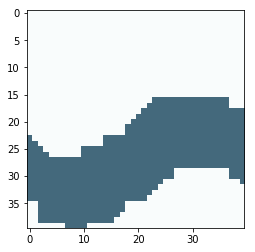

Percentage of pointwise overlap: 1.0


In [6]:
result = perform_comparison(100, 'normal', 20, 10, 10, post_hoc_smooth=True)

In [7]:
from tqdm import tqdm_notebook as tqdm

In [9]:
results_40 = []
for i in tqdm(range(200)):
    current_result = perform_comparison(i, 'normal', 20, 1, 20, post_hoc_smooth=True, verbose=False)
    results_40.append(current_result)

In [10]:
results_80 = []
for i in tqdm(range(200)):
    current_result = perform_comparison(i, 'normal', 20, 3, 20, post_hoc_smooth=True, verbose=False)
    results_80.append(current_result)

In [11]:
results_120 = []
for i in tqdm(range(200)):
    current_result = perform_comparison(i, 'normal', 20, 5, 20, post_hoc_smooth=True, verbose=False)
    results_120.append(current_result)

In [12]:
results_160 = []
for i in tqdm(range(200)):
    current_result = perform_comparison(i, 'normal', 40, 6, 20, post_hoc_smooth=True, verbose=False)
    results_160.append(current_result)

In [13]:
results_200 = []
for i in tqdm(range(200)):
    current_result = perform_comparison(i, 'normal', 40, 8, 20, post_hoc_smooth=True, verbose=False)
    results_200.append(current_result)

In [22]:
results = results_40 + results_80 + results_120 + results_160 + results_200
x = [40] * 200 + [80] * 200 + [120] * 200 + [160] * 200 + [200] * 200
results = np.asarray(results)
x = np.asarray(x) / 4.0

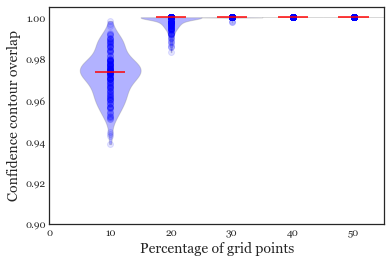

In [58]:
fig, ax = plt.subplots(figsize=(6, 4))
violin_parts = ax.violinplot([results_40, results_80, results_120, results_160, results_200], 
                             [10, 20, 30, 40, 50], 
                             widths=10, showmedians=True, showextrema=False)
plt.setp(violin_parts['bodies'], facecolor='blue', edgecolor='gray')
violin_parts['cmedians'].set_color('r')
plt.scatter(x, results, alpha=0.1, color='b')
plt.xlim(0, 55)
plt.ylim(0.9, 1.005)
#plt.title('Results for 200 NH data sets', fontsize=14, fontweight='bold')
plt.xlabel('Percentage of grid points', fontsize=14)
plt.ylabel('Confidence contour overlap', fontsize=14)
plt.savefig('comparison.png')
plt.show()